# This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

# By see the dataset we can make out that its a clear problem of classification model which tells us that based on the studies we have to identify the right candidate wheather to give him the loan or not

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_curve
import warnings
warnings.filterwarnings('ignore')


In [2]:
loan=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DATA INSPECTION

In [4]:
loan.shape         # the dataset has total of 614 rows and 13 columns

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset has a combination of both numerical and categorical  data.

We have 7 categorical feature 5 numerical feature with 1 target feature with categorical feature.

# # EDA

In [6]:
# Identify for missing values

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In the dataset we have 3 categorical feature with missing values and 3 numerical feature with missing values.

In [7]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
# To see the percentage of loan status

loan['Loan_Status'].value_counts( normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Seems the target variable is quite imbalanced

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

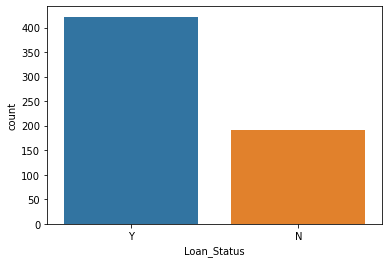

In [9]:
# As the target variable is categorical variable we have to go for count plot.
sns.countplot(loan['Loan_Status'])

Imbalance in target variable is clearly visible

In [10]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

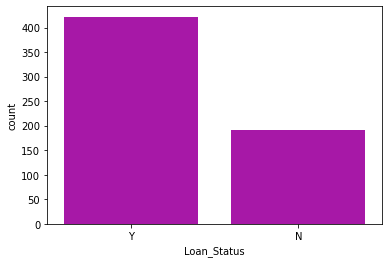

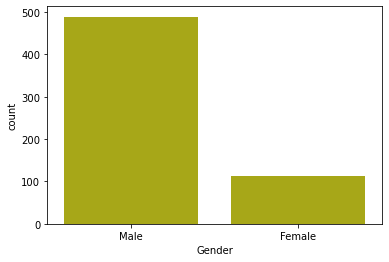

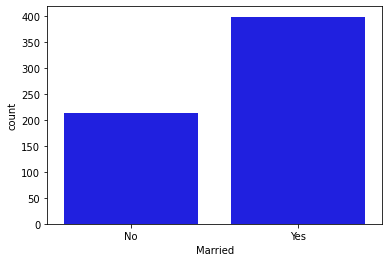

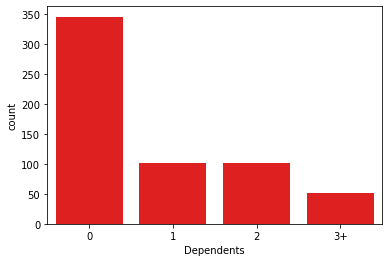

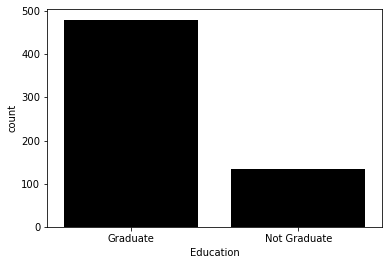

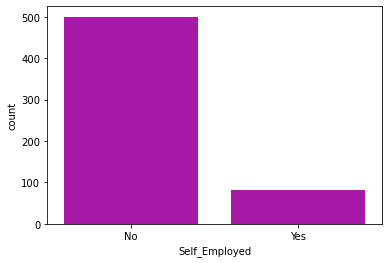

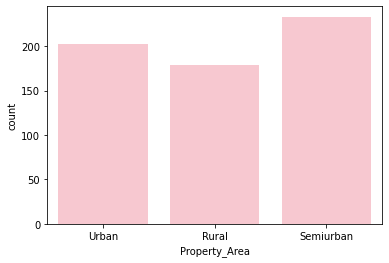

In [11]:
# Lets see the plot of all categorical variable distribution in the dataset
sns.countplot(loan['Loan_Status'],color='m')
plt.show()
sns.countplot(loan['Gender'],color='y')
plt.show()
sns.countplot(loan['Married'],color='b')
plt.show()
sns.countplot(loan['Dependents'],color='r')
plt.show()
sns.countplot(loan['Education'],color='black')
plt.show()
sns.countplot(loan['Self_Employed'],color='m')
plt.show()

sns.countplot(loan['Property_Area'],color='pink')
plt.show()

Observation:
1. Most of the applicants are male.
2. More than 60 % of applicants are married.
3. Zero dependencies people are more in number than people with dependencies.
4. Graduates are 75% more than not graduates.
5. less no.of people are self employeed.
6. people staying at semiurban area is amore in number as compared to urban then rural.


# Compare the  categorical featues in comparision with Loan status

Text(0.5, 1.0, 'Gender Vs Loan sTatus')

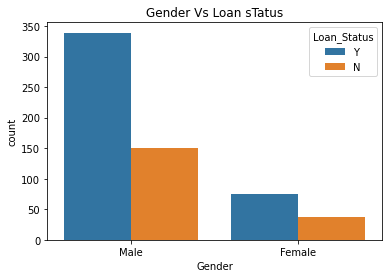

In [12]:
sns.countplot(x='Gender',data=loan,hue='Loan_Status')
plt.title('Gender Vs Loan sTatus')

Male candidates are more likely to get loan if compared in percentage as the the graph shows 

Text(0.5, 1.0, 'Married Vs Loan sTatus')

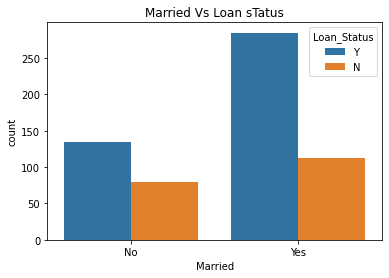

In [13]:
sns.countplot(x='Married',data=loan,hue='Loan_Status')
plt.title('Married Vs Loan sTatus')

Married person are more likely to pass there loan

Text(0.5, 1.0, 'Dependents Vs Loan sTatus')

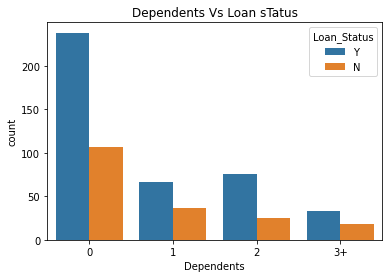

In [14]:
sns.countplot(x='Dependents',data=loan,hue='Loan_Status')
plt.title('Dependents Vs Loan sTatus')

Loan acceptance are more in case of 0 dependencies followed by 2 then 1 and then 3+

Text(0.5, 1.0, 'Education Vs Loan Status')

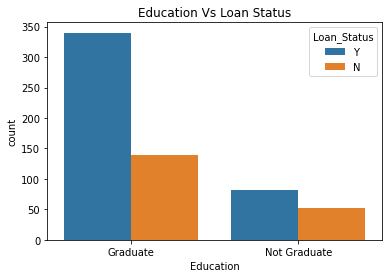

In [15]:
sns.countplot(x='Education',data=loan,hue='Loan_Status')
plt.title('Education Vs Loan Status')

Graduate person's are more likely to get their loan sanctioned than not graduate

Text(0.5, 1.0, 'Self_Employed Vs Loan Status')

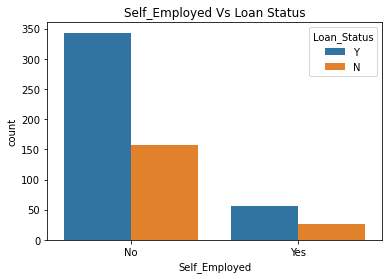

In [16]:
sns.countplot(x='Self_Employed',data=loan,hue='Loan_Status')
plt.title('Self_Employed Vs Loan Status')

People with job are more likely to get the loan

Text(0.5, 1.0, 'LoanAmount Vs Loan Status')

<Figure size 576x576 with 0 Axes>

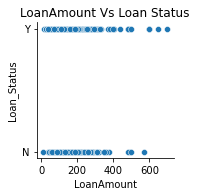

In [17]:
plt.figure(figsize=(8,8))
sns.pairplot(loan,x_vars='LoanAmount',y_vars='Loan_Status',kind='scatter')
plt.title('LoanAmount Vs Loan Status')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

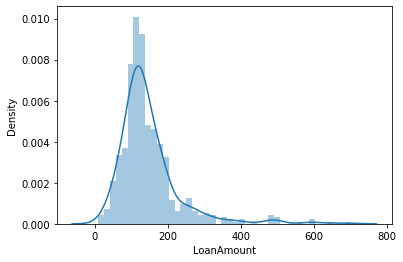

In [18]:
sns.distplot(loan.LoanAmount)

In [19]:
# the is almost normalised but some outliers are expected

Text(0.5, 1.0, 'ApplicantIncome     Vs Loan Status')

<Figure size 576x576 with 0 Axes>

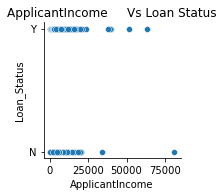

In [20]:
plt.figure(figsize=(8,8))
sns.pairplot(loan,x_vars='ApplicantIncome',y_vars='Loan_Status',kind='scatter')
plt.title('ApplicantIncome     Vs Loan Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

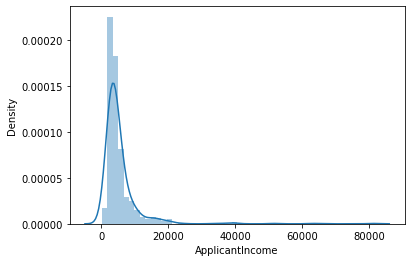

In [21]:
sns.distplot(loan.ApplicantIncome)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

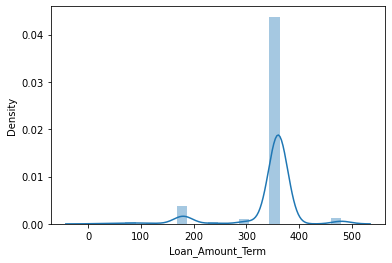

In [22]:
sns.distplot(loan.Loan_Amount_Term) 

This feature is right skewed 

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

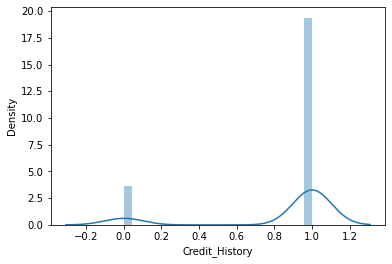

In [23]:
sns.distplot(loan.Credit_History,hist=True,kde=True)

The data is right skewed

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

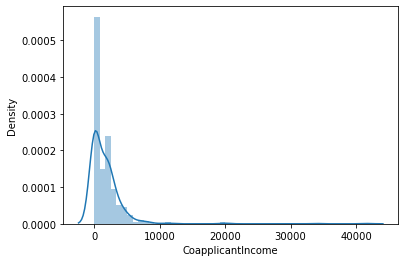

In [24]:
sns.distplot(loan.CoapplicantIncome  ,hist=True,kde=True)

the feture is left skewed

In [25]:
# Change the target variable into numerical data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan['Loan_Status']=le.fit_transform(loan['Loan_Status'])

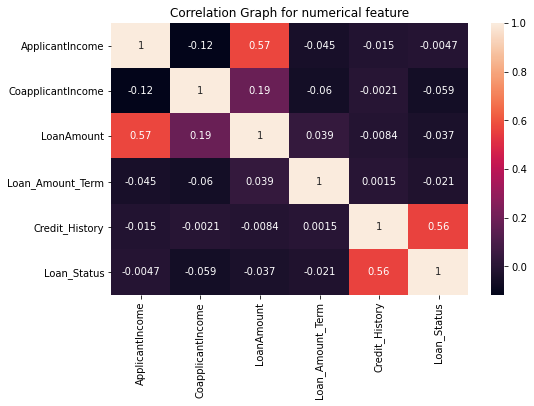

In [26]:
# Now see the  correlation among numerical data with our target variable:

plt.figure(figsize=(8,5))
sns.heatmap(loan.corr(),annot=True)
plt.title('Correlation Graph for numerical feature')
plt.show()


Observation: 
1. Only 57% of data of 'Applicant Income','Loan amount' and 'Credit History'  are correlated with theLoan Status.
2. It is also observed that very less correlation is there among other features and also with Loan Status. 

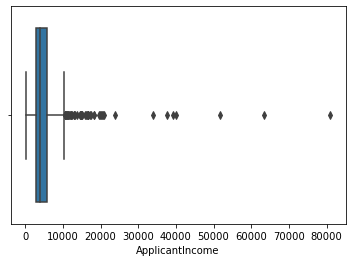

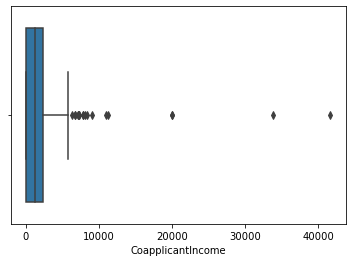

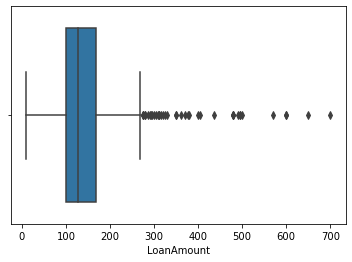

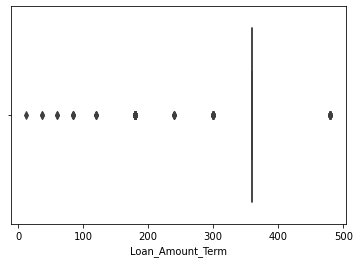

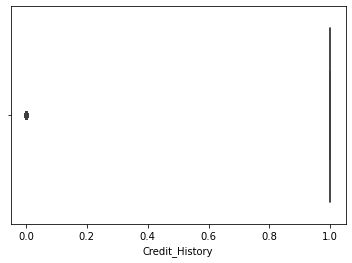

In [27]:
# See for Outliers

sns.boxplot(loan.ApplicantIncome)
plt.show()
sns.boxplot(loan.CoapplicantIncome)
plt.show()
sns.boxplot(loan.LoanAmount)
plt.show()
sns.boxplot(loan.Loan_Amount_Term)
plt.show()
sns.boxplot(loan.Credit_History)
plt.show()


<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

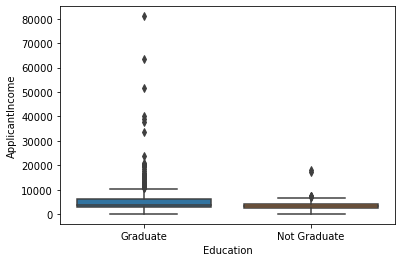

In [28]:
sns.boxplot(  x=loan['Education'],y=loan['ApplicantIncome'],) 

# Data processing

In [29]:
# Treat the missing values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

We will treat the missing values in all the features.

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

In [30]:
# Using mode for all categorical and credit history(numerical) as well:

loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)

# For imputing LoanAmount we using mean:

loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)

In [31]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All null values are treated well

<AxesSubplot:xlabel='LoanAmount'>

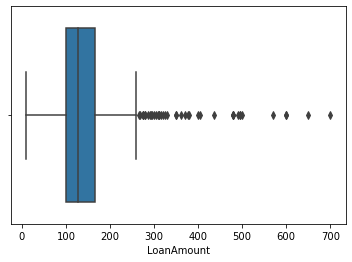

In [32]:
sns.boxplot(loan.LoanAmount)

# Having much of outliers 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

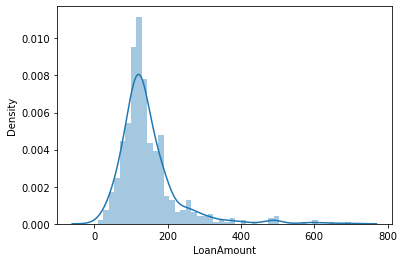

In [33]:
sns.distplot(loan.LoanAmount,hist=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

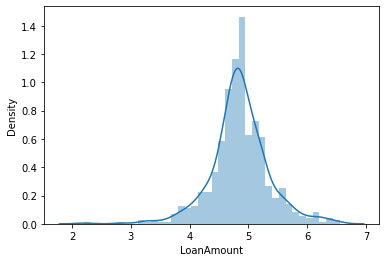

In [34]:
# To minimise the ouitliers we can use log normal

loan['LoanAmount']=np.log(loan['LoanAmount'])
sns.distplot(loan.LoanAmount,hist=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

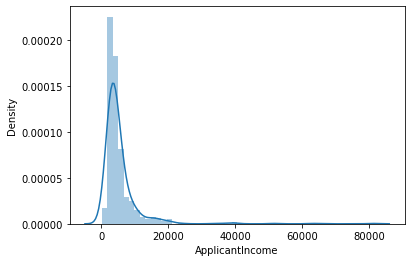

In [35]:
# normalizing the Applicant income  
sns.distplot(loan.ApplicantIncome)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

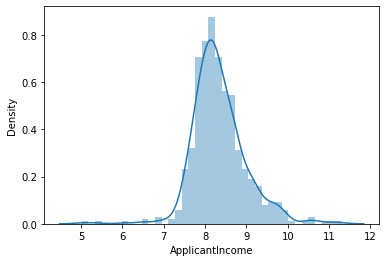

In [36]:
loan['ApplicantIncome']=np.log(loan['ApplicantIncome'])
sns.distplot(loan.ApplicantIncome,hist=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

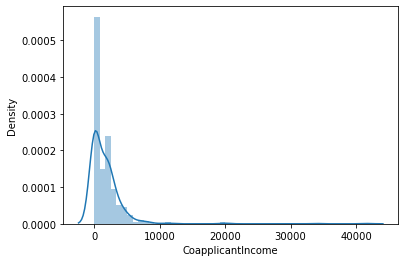

In [37]:
# Normalizing Co Applicant
sns.distplot(loan.CoapplicantIncome  ,hist=True,kde=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

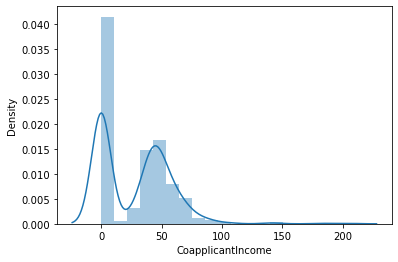

In [38]:
loan['CoapplicantIncome']=np.sqrt(loan['CoapplicantIncome']) # Using  sqrt normalization
sns.distplot(loan.CoapplicantIncome,hist=True)

In [39]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.852030,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,8.430109,38.832976,4.852030,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,48.559242,4.787492,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,360.0,1.0,Urban,1


In [40]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

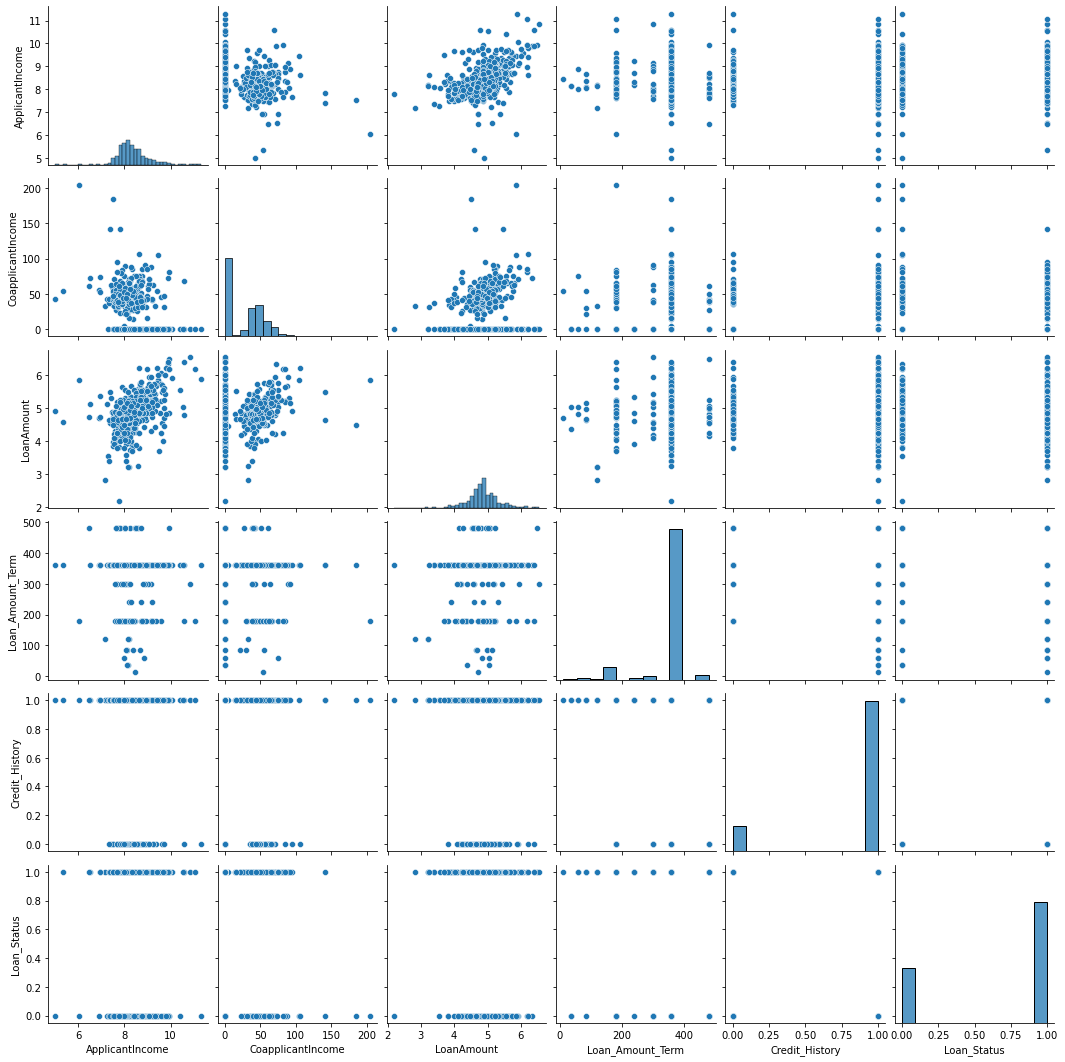

In [41]:
sns.pairplot(loan)

In [42]:
# Treat the categorical features

In [43]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(1), object(7)
memory usage: 60.1+ KB


In [44]:
loan['Gender']=le.fit_transform(loan['Gender'])
loan['Married']=le.fit_transform(loan['Married'])
loan['Dependents']=le.fit_transform(loan['Dependents'])
loan['Education']=le.fit_transform(loan['Education'])
loan['Self_Employed']=le.fit_transform(loan['Self_Employed'])
loan['Property_Area']=le.fit_transform(loan['Property_Area'])

In [45]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,38.832976,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,48.559242,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


Loan_ID does not hold any functionality hence we can drop the feature

In [46]:
loan=loan.drop('Loan_ID',axis=1)

In [47]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,38.832976,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,48.559242,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


Now our data is abosolutely clear for further model building

In [48]:
x=loan.drop('Loan_Status',axis=1)
y=loan['Loan_Status']

In [49]:
print('x:',x.shape)
print('y:',y.shape)

x: (614, 11)
y: (614,)


# Now we will be fiiting the model into different types of classification algorithm as  we have identified

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [51]:
print('X-train shape:',x_train.shape)
print('Y-train shape:',y_train.shape)
print('X-test shape:',x_test.shape)
print('Y-test shape:',y_test.shape)

X-train shape: (491, 11)
Y-train shape: (491,)
X-test shape: (123, 11)
Y-test shape: (123,)


In [52]:
Logistic=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()

NB=GaussianNB()

In [53]:
algo=[Logistic,DecisionTree,knn,RandomForest,NB]
acc_models={}
for model in algo:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acu_score=accuracy_score(y_test,y_pred)
    print("-"*60)
    acc_models[model]=round(accuracy_score(y_test,y_pred)*100,1)
    print(f"The model {model} has:: \n\t Accuracy :: {round(accuracy_score(y_test,y_pred)*100,1)}% \n\t F1_score is :: {f1_score(y_test,y_pred)} \n\t Classification_Report is :: {classification_report(y_test,y_pred)} \n\t Confusion_matrix is :: {confusion_matrix(y_test,y_pred)}")
    print("-"*60)
    print("\n")

------------------------------------------------------------
The model LogisticRegression() has:: 
	 Accuracy :: 83.7% 
	 F1_score is :: 0.9009900990099009 
	 Classification_Report is ::               precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123
 
	 Confusion_matrix is :: [[12 19]
 [ 1 91]]
------------------------------------------------------------


------------------------------------------------------------
The model DecisionTreeClassifier() has:: 
	 Accuracy :: 63.4% 
	 F1_score is :: 0.7486033519553073 
	 Classification_Report is ::               precision    recall  f1-score   support

           0       0.31      0.35      0.33        31
           1       0.77      0.73      0.75        92

    accuracy           

In [54]:
acc_models

{LogisticRegression(): 83.7,
 DecisionTreeClassifier(): 63.4,
 KNeighborsClassifier(): 78.0,
 RandomForestClassifier(): 78.0,
 GaussianNB(): 83.7}

Logistic Regression is giving better accuracy

In [55]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,11):
        cvS=cross_val_score(model,x,y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.8110749185667753 at k-fold::2

Mean CV Score of model LogisticRegression():: 0.8062171209947394 at k-fold::3

Mean CV Score of model LogisticRegression():: 0.8095025889143536 at k-fold::4

Mean CV Score of model LogisticRegression():: 0.809462881514061 at k-fold::5

Mean CV Score of model LogisticRegression():: 0.8094739513928548 at k-fold::6

Mean CV Score of model LogisticRegression():: 0.8095051500223914 at k-fold::7

Mean CV Score of model LogisticRegression():: 0.8078648325358853 at k-fold::8

Mean CV Score of model LogisticRegression():: 0.8094629156010229 at k-fold::9

Mean CV Score of model LogisticRegression():: 0.8095716552088842 at k-fold::10


DecisionTreeClassifier()
-------------------------


Mean CV Score of model DecisionTreeClassifier():: 0.7019543973941368 at k-fold::2

Mean CV Score of model DecisionTreeClassifier():: 0.7133189861310377 at k-fold::3

Mean CV Score of mo

In [56]:
CVmodel

{'LogisticRegression()': [0.8110749185667753],
 'DecisionTreeClassifier()': [0.727929335985602],
 'KNeighborsClassifier()': [0.6873347435219459],
 'RandomForestClassifier()': [0.7965011961722488],
 'GaussianNB()': [0.8078526096428909]}

After checking for CV and KFold also logistic regression is showing maximum accracy

# Now we will be hypertuning our model in order to increase the accuracy

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [58]:
LogRg=LogisticRegression()

In [59]:
#Defining models and parameter
solver=['newton_cg','lbfgs','liblinear']
penalty=['l2']
c_values=[100,10,1.0,.1,.01]


In [60]:
# defining grid search
grid=dict(solver=solver,penalty=penalty,C=c_values)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=LogRg,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)
grid_result=grid_search.fit(x_train,y_train)

In [61]:
print('Best_Score:',grid_result.best_score_) 
print('Best_param:',grid_result.best_params_)

Best_Score: 0.8024217687074828
Best_param: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [62]:
Y_pred_LogRf_best = grid_result.predict(x_test)

In [63]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_LogRf_best) * 100, 2))
print(classification_report(y_test,Y_pred_LogRf_best))
print("Cofusion matrix:",confusion_matrix(y_test,Y_pred_LogRf_best))

Logistic Regression:
Accuracy score: 83.74
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123

Cofusion matrix: [[12 19]
 [ 1 91]]


It has been observed that our model has shown almost same accuracy after being hyper tuning i.e83.74%
just increased by .04 %

In [64]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [65]:
pred_probability=grid_result.predict_proba(x_test)[:,1]
pred_probability

array([0.71807335, 0.73364136, 0.75957219, 0.72958763, 0.71187251,
       0.76028754, 0.7612718 , 0.72381287, 0.68042369, 0.3119562 ,
       0.66359743, 0.73497331, 0.77597769, 0.694732  , 0.68023271,
       0.33449069, 0.63363072, 0.74211547, 0.72243546, 0.68318639,
       0.32975259, 0.7194166 , 0.67022029, 0.81785733, 0.7404749 ,
       0.76833956, 0.78593854, 0.67563812, 0.80940342, 0.67966775,
       0.76736664, 0.81778386, 0.75676804, 0.70067915, 0.70346547,
       0.71242903, 0.71597155, 0.76662716, 0.85470717, 0.7584255 ,
       0.2905101 , 0.63978049, 0.69427334, 0.68885102, 0.78813607,
       0.71555379, 0.72678684, 0.66292777, 0.28790467, 0.74510907,
       0.72957615, 0.70301146, 0.79414521, 0.29928073, 0.72756039,
       0.75882166, 0.76863146, 0.73944252, 0.63224959, 0.67322149,
       0.27229457, 0.74732791, 0.72845307, 0.69612508, 0.74769126,
       0.75649063, 0.75351597, 0.70304321, 0.68430575, 0.72019771,
       0.7668662 , 0.78056117, 0.77402435, 0.67905886, 0.73822

In [66]:
fpr,tpr,thresholds=roc_curve(y_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.         0.         0.03225806 0.03225806 0.06451613
 0.06451613 0.09677419 0.09677419 0.16129032 0.16129032 0.19354839
 0.19354839 0.25806452 0.25806452 0.29032258 0.29032258 0.32258065
 0.32258065 0.38709677 0.38709677 0.41935484 0.41935484 0.4516129
 0.4516129  0.48387097 0.48387097 0.51612903 0.51612903 0.5483871
 0.5483871  0.61290323 0.61290323 0.80645161 0.80645161 1.        ]


[0.         0.01086957 0.11956522 0.11956522 0.16304348 0.16304348
 0.18478261 0.18478261 0.32608696 0.32608696 0.36956522 0.36956522
 0.42391304 0.42391304 0.5326087  0.5326087  0.56521739 0.56521739
 0.60869565 0.60869565 0.67391304 0.67391304 0.68478261 0.68478261
 0.81521739 0.81521739 0.82608696 0.82608696 0.88043478 0.88043478
 0.90217391 0.90217391 0.98913043 0.98913043 1.         1.        ]


[1.85470717 0.85470717 0.78593854 0.78078472 0.7760621  0.77597769
 0.77389596 0.76904158 0.76028754 0.75957219 0.75676804 0.7565223
 0.75351597 0.74769126 0.7369274  0.7358981  0.73233748 0.7

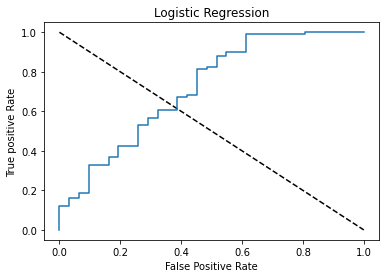

In [67]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Logistic Regression')
plt.show()

# Also we should hypertune the Gaussian Model and check if my accuracy increases:

In [68]:
nb_classifier=GaussianNB()


In [69]:
param_NB={'var_smoothing':np.logspace(0,-9,num=100)}
g_NB_result=GridSearchCV(estimator=nb_classifier,param_grid=param_NB,cv=cv,verbose=1,scoring='accuracy')
g_NB_result.fit(x_train,y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5....
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [70]:
print('Best_Score:',g_NB_result.best_score_) 
print('Best_param:',g_NB_result.best_params_)

Best_Score: 0.7976734693877551
Best_param: {'var_smoothing': 3.511191734215127e-05}


In [71]:
Y_pred_NB_best = g_NB_result.predict(x_test)

In [72]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_NB_best) * 100, 2))
print(classification_report(y_test,Y_pred_NB_best))
print("Cofusion matrix:",confusion_matrix(y_test,Y_pred_NB_best))

Random Forest Classifier:
Accuracy score: 82.93
              precision    recall  f1-score   support

           0       0.86      0.39      0.53        31
           1       0.83      0.98      0.90        92

    accuracy                           0.83       123
   macro avg       0.84      0.68      0.71       123
weighted avg       0.83      0.83      0.80       123

Cofusion matrix: [[12 19]
 [ 2 90]]


# Final observation
The score for GaussianNB is comparatively low as compared to Logistic Regression (with 83.74% accuracy).Hence we will be going ahead with Logistic regression model rather than any other model

In [73]:
import pickle

In [74]:
filename="Loan Application Status"
pickle.dump(LogRg, open(filename,'wb'))